In [1]:
import numpy as np
import matplotlib.pyplot as plt

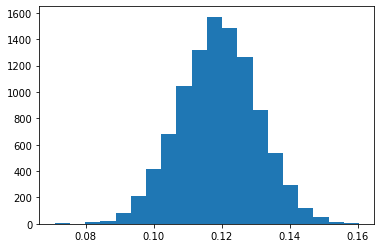

0.1189598933205179


In [2]:
np.random.seed(0)

def rbf_kernel(x, y, s=0.5):
    """ Vectorized Gaussian RBF kernel """
    return np.exp(-((x-y)*(x-y)).sum(axis=1)/(2*s*s))

def mmd_h_(x0, x1, y0, y1, s=0.5):
    """ Implements the one-sample U-statistic from Lemma 6 in A kernel two-sample test"""
    return rbf_kernel(x0, x1, s) + rbf_kernel(y0, y1, s) - rbf_kernel(x0, y1, s) - rbf_kernel(x1, y0, s)

def mmd_lin(x, y, s=0.5):
    """ Lienar MMD test statistic """
    n = x.shape[0]
    n2 = int(n/2)
    x0 = x[:n2,]
    x1 = x[n2:(2*n2),]
    y0 = y[:n2,]
    y1 = y[n2:(2*n2),]
    
    return mmd_h_(x0, x1, y0, y1, s).mean()


ms = []
n = 5000
N = 10000
for i in range(N):
    x = np.random.normal(0,1, (n,1)) #np.random.randn(n,1)
    #y = np.random.normal(0,3*np.sqrt(2), (n,1)) #np.random.randn(n,1)
    y = np.random.laplace(0,3, (n,1))
    #y = np.random.laplace(0,1/np.sqrt(2), (n,1))
    ms.append(mmd_lin(x, y))
    
    
plt.hist(ms, bins=20)
plt.show()

print(np.mean(ms))